In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [11]:
import matplotlib.pyplot as plt

In [5]:
# Load your dataset
# df = pd.read_csv('your_dataset.csv')
df = pd.read_csv('fixed_bonbanh_v5_0712.csv')
df.head(4)

,year,kms,price,brand_over10Bs,brand_5to10Bs,brand_2to5Bs,brand_1to2Bs,brand_under1B,HCM/HN market,other market,...,Van/Minivan,SUV,Hatchback,Bán tải / Pickup,Sedan,Crossover,Coupe,Convertible/Cabriolet,Truck,Wagon
0,2022.0,21000,635,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1,2023.0,45000,1260,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,2020.0,30000,1759,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,2021.0,34000,695,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
# Extract features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(
    f'MSE: {mean_squared_error(y_test, predictions)},MAE: {mean_absolute_error(y_test, predictions)}, R2: {r2_score(y_test, predictions)}'
)


MSE: 2287846.058096142,MAE: 616.061596998818, R2: 0.6443398244106618


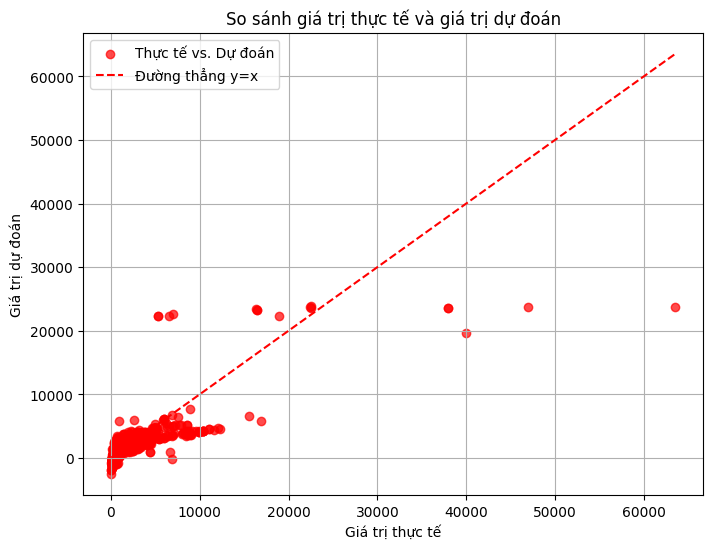

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, c='red', label='Thực tế vs. Dự đoán')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Đường thẳng y=x')

plt.title('So sánh giá trị thực tế và giá trị dự đoán')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.legend()
plt.grid(True)

plt.show()